In [78]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [79]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [19]:
app_group = app_train.groupby(["CODE_GENDER", "REGION_RATING_CLIENT"])
result = app_group["AMT_INCOME_TOTAL"].agg(["count", "mean"]).reset_index()
result

,CODE_GENDER,REGION_RATING_CLIENT,count,mean
0,F,1,20421,223979.995372
1,F,2,149658,149967.081018
2,F,3,32369,141207.947292
3,M,1,11776,274348.678329
4,M,2,77323,184973.403242
5,M,3,15960,174474.468902
6,XNA,2,3,180000.000000
7,XNA,3,1,207000.000000


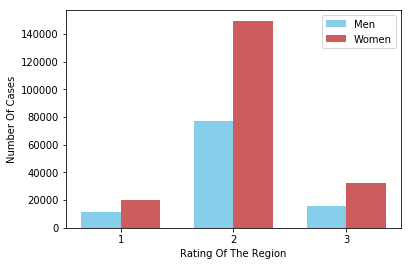

In [18]:
m_count = list(result.loc[result.CODE_GENDER=="M", "count"])
f_count = list(result.loc[result.CODE_GENDER=="F", "count"])

ind = np.arange(len(m_count))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind-width/2, m_count, width, color='SkyBlue', label='Men')
ax.bar(ind+width/2, f_count, width, color='IndianRed', label='Women')

ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(range(1,4))
ax.set_xlabel('rating of the region'.title())
ax.set_ylabel('number of cases'.title())
ax.legend()

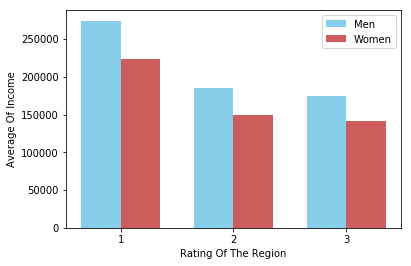

In [20]:
m_mean = list(result.loc[result.CODE_GENDER=="M", "mean"])
f_mean = list(result.loc[result.CODE_GENDER=="F", "mean"])

ind = np.arange(len(m_count))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind-width/2, m_mean, width, color='SkyBlue', label='Men')
ax.bar(ind+width/2, f_mean, width, color='IndianRed', label='Women')

ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(range(1,4))
ax.set_xlabel('rating of the region'.title())
ax.set_ylabel('average of income'.title())
ax.legend()

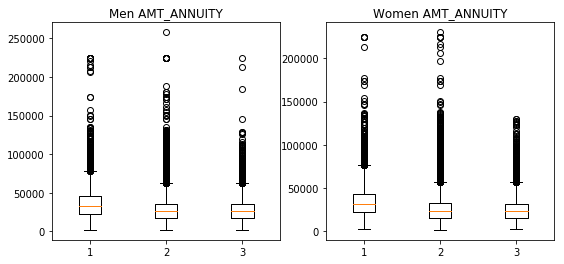

In [82]:
m_data = [app_train.loc[(app_train.CODE_GENDER=="M") & (app_train.REGION_RATING_CLIENT==i), "AMT_ANNUITY"].dropna() for i in range(1,4)]
f_data = [app_train.loc[(app_train.CODE_GENDER=="F") & (app_train.REGION_RATING_CLIENT==i), "AMT_ANNUITY"].dropna() for i in range(1,4)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot1 = axes[0].boxplot(m_data, labels=range(1,4))
axes[0].set_title('Men AMT_ANNUITY')

bplot2 = axes[1].boxplot(f_data, labels=range(1,4))
axes[1].set_title('Women AMT_ANNUITY')

plt.show()